## Stock Bot
Okay Im gonna make a DIY stock trading, reinforcment learning bot on my own with preferably only tensorflow, numpy, and padas. I actually have no idea how to do that, sooo lets try it out!

### Planning
I need to have the following items built
- the environment
- the agent
- memory for the agent
- the policy for the agent
- the neural net for the agent

TODO: Train and wth is wrong with the probabilities contain nAn for training

In [1]:
from tensorflow import keras
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf
import gym_anytrading
import rl
from StockTradeEnv import FastTrainingStockTradeEnv
import quantstats as qs

## Environment
The environment will contain the observable variables:
    -
    -
The environment will contain the avalible actions of:
    -
    -
    -

In [2]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Activation, Concatenate
from tensorflow.keras.optimizers import Adam
from stable_baselines3 import A2C
from stable_baselines3.a2c import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import DummyVecEnv

# Parallel environments
stks = ['sbux','nflx','tmus','adct','h','bngo','amzn','nio','fb','gme']#,'work']
env = DummyVecEnv([lambda: FastTrainingStockTradeEnv(ticker=stks[i],frame_bound=(100, 10000000), window_size=10,initial_balance=25000) for i in range(len(stks))])
# env = FastTrainingStockTradeEnv(ticker='work',frame_bound=(100, 10000000), window_size=10,initial_balance=25000)

/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precisi

In [3]:
model = A2C(MlpPolicy, env, verbose=1)

Using cpu device


In [4]:
#TODO: WHEN I GET BACK run this, see how it goes, and modify reward system
#don't print too much, if you do, jupyter will crash
model = model.learn(total_timesteps=9000)

-------------------------------------
| time/                 |           |
|    fps                | 19337     |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -5.67     |
|    explained_variance | -6.28e+07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 234       |
|    std                | 0.998     |
|    value_loss         | 2.28e+03  |
-------------------------------------


In [5]:
def eval_(stk_ticker):
    env = FastTrainingStockTradeEnv(ticker=stk_ticker,frame_bound=(100, 10000000), window_size=10,initial_balance=25000,verbose=2)
    observation = env.reset()
    itr = 0
    while True:
        observation = observation
        action, _states = model.predict(observation)
        observation, reward, done, info = env.step(action)
        itr+=1
        if done:
            print("info:", info)
            print("iters:",itr)
            break
    return env
            
def eval_rand(stk_ticker,iter_manual=30):
    env = FastTrainingStockTradeEnv(ticker=stk_ticker,frame_bound=(100, 10000000), window_size=10,initial_balance=25000,verbose=2)
    observation = env.reset()
    itr = 0
    while itr <= iter_manual:
        observation = observation
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        itr+=1
        if itr == iter_manual:
            print("info:", info)
            print("iters:",itr)
            break

In [6]:
env = eval_('work')

Step: 10 ----------------------
        Tried to Sell. Unable.
       step reward: -2.0, og step reward: 0.0, add_to_step_reward: -2
Step: 11 ----------------------
        work: Bought 1 stock(s) for:21.299999237060547, networth: 25000.0, shares: 1
       step reward: 0.0, og step reward: 0.0, add_to_step_reward: 0
Step: 12 ----------------------
        work: Bought 1 stock(s) for:21.690000534057617, networth: 25000.0, shares: 2
       step reward: 0.3900012969970703, og step reward: 0.3900012969970703, add_to_step_reward: 0
Step: 13 ----------------------
        work: Sold 2 stock(s) for:22.860000610351562, networth: 25000.390001296997, shares: 0
       step reward: 14.040000915527344, og step reward: 2.3400001525878906, add_to_step_reward: 11.700000762939453
Step: 14 ----------------------
        Tried to Sell. Unable.
       step reward: -2.0, og step reward: 0.0, add_to_step_reward: -2
Step: 15 ----------------------
        work: Bought 2 stock(s) for:21.18000030517578, networ

/Users/ryandu_1/miniforge3/envs/tfenv/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


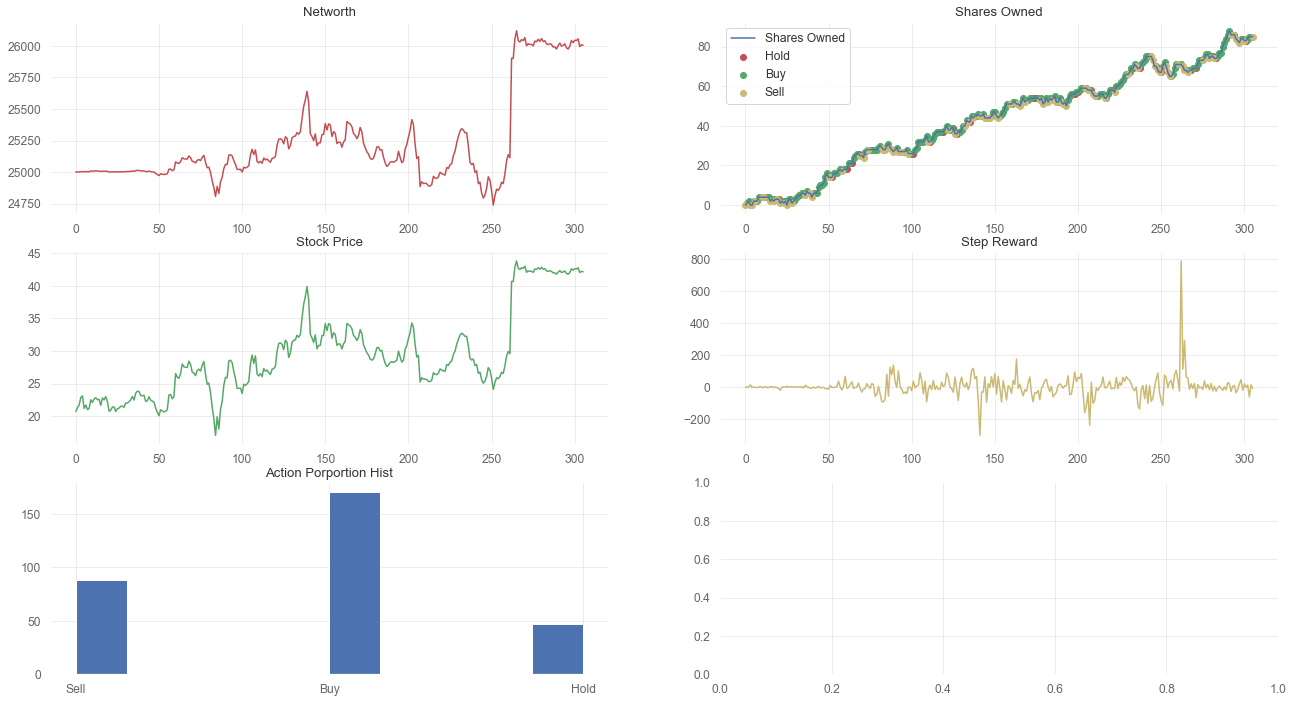

In [7]:
def plt_actions(history,plot_loc):
    acth = np.array([history['action_type']]).reshape(-1)
    shares = np.array([history['shares_owned']]).reshape(-1)
    hold_x=[]
    buy_x=[]
    sell_x=[]
    hold_y=[]
    buy_y=[]
    sell_y=[]
    for i in range(len(acth)):
        if acth[i] == "Hold":
            hold_x.append(i)
            hold_y.append(shares[i])
        elif acth[i] == "Buy":
            buy_x.append(i)
            buy_y.append(shares[i])
        elif acth[i] == "Sell":
            sell_x.append(i)
            sell_y.append(shares[i])
    plot_loc.scatter(hold_x,hold_y,c='r',label='Hold')
    plot_loc.scatter(buy_x,buy_y,c='g',label='Buy')
    plot_loc.scatter(sell_x,sell_y,c='y',label='Sell')
    plot_loc.legend()
    
def plot_history(history,size):
    fig, axs = plt.subplots(3, 2)  # a figure with a 2x2 grid of Axes
    axs[0,0].plot(history['networth'],'r')
    axs[0,0].set_title("Networth")
    axs[0,1].plot(history['shares_owned'],'b',label="Shares Owned")
    plt_actions(history,axs[0,1])
    axs[0,1].set_title("Shares Owned")
    axs[1,0].plot(history['price'],'g')
    axs[1,0].set_title("Stock Price")
    axs[1,1].plot(history['reward'],'y')
    axs[1,1].set_title("Step Reward")
    axs[2,0].hist(history['action_type'])
    axs[2,0].set_title("Action Porportion Hist")
    fig.set_size_inches(size)
    return fig
fig = plot_history(env.history,(22, 12))

In [8]:
history.keys()

NameError: name 'history' is not defined

In [ ]:
a_s_scatter[1]